In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from numpy.testing import assert_almost_equal, assert_array_almost_equal

import pytest
import pandas as pd
import numpy as np
import sys
sys.path.append('..')
from table_evaluator.helpers import *
from table_evaluator import TableEvaluator

C:\Users\C64062\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
real, fake = load_data('../data/real_test_sample.csv', '../data/fake_test_sample.csv')
cat_cols = ['trans_type', 'trans_operation', 'trans_k_symbol']


In [19]:
real.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,951892,3245,3878.0,13680.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,2165
1,3547680,515,65.9,14898.6,CREDIT,UNKNOWN,INTEREST_CREDITED,2006
2,1187131,4066,32245.0,57995.5,CREDIT,COLLECTION_FROM_OTHER_BANK,UNKNOWN,2139
3,531421,1811,3990.8,23324.9,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,LOAN_PAYMENT,892
4,37081,119,12100.0,36580.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,654


In [20]:
fake.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
0,911598,3001,13619.0,92079.0,CREDIT,COLLECTION_FROM_OTHER_BANK,UNKNOWN,1885
1,377371,1042,4174.0,32470.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1483
2,970113,3225,274.0,57608.0,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,1855
3,450090,1489,301.0,36258.0,CREDIT,CREDIT_IN_CASH,UNKNOWN,885
4,1120409,3634,6303.0,50975.0,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,1211


In [4]:
table_evaluator = TableEvaluator(real, fake)

Do Visual Evaluation

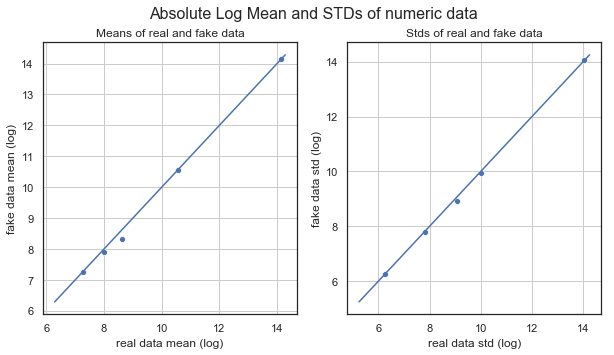

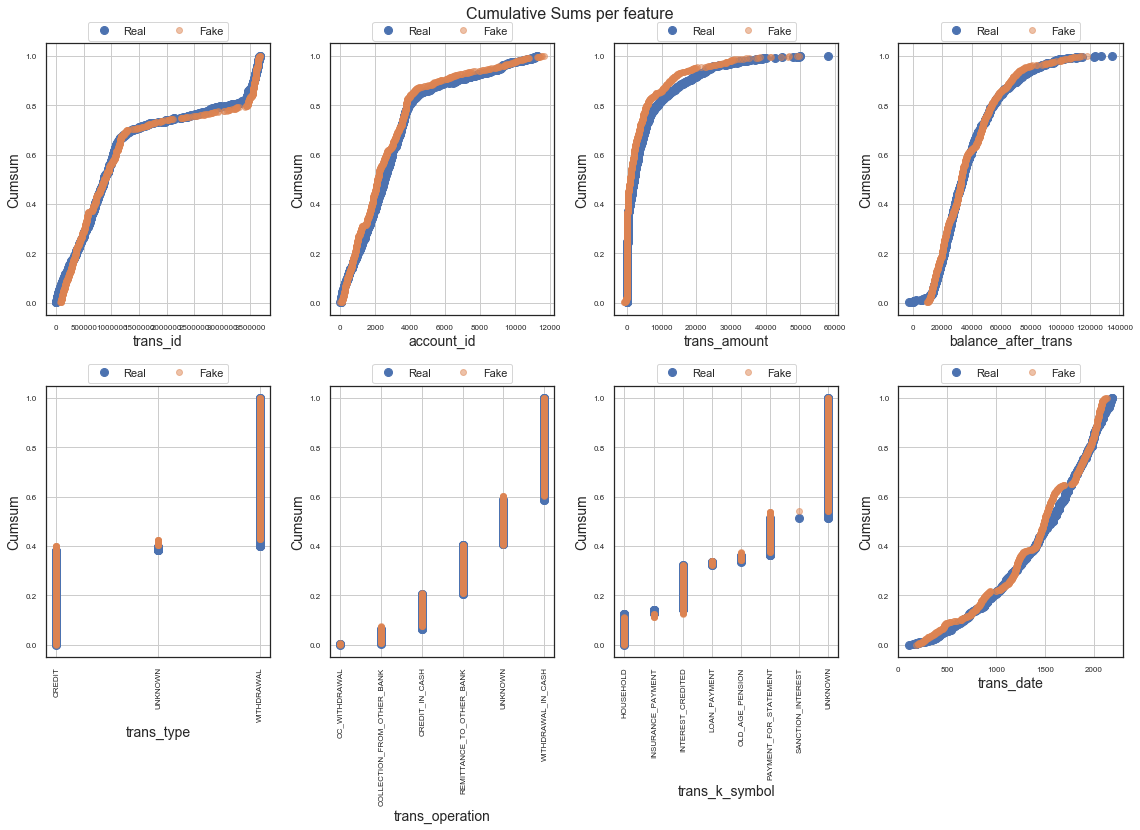

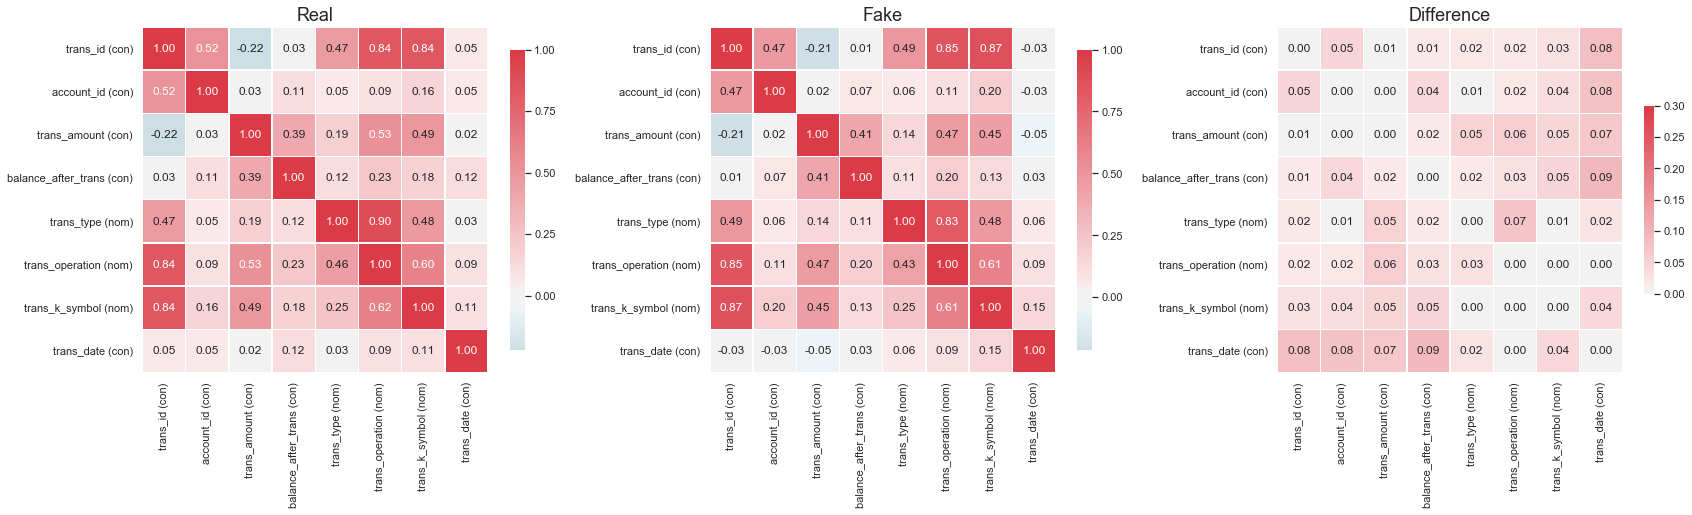

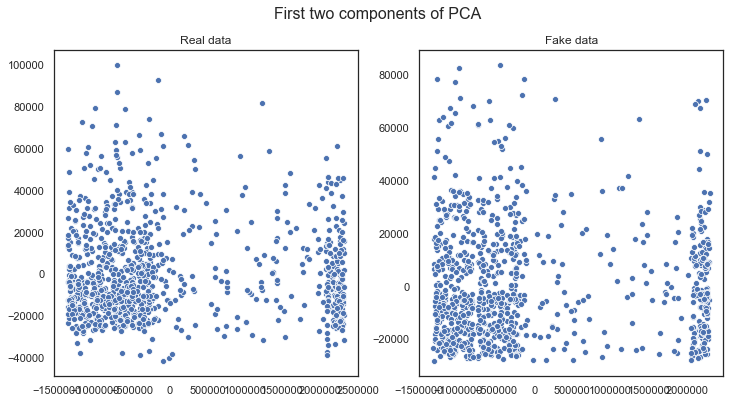

In [28]:
table_evaluator.visual_evaluation()

In [20]:
len(real)

1000

In [18]:
table_evaluator.get_copies(return_len=True)

0

In [21]:
table_evaluator.get_duplicates()

(0, 0)

In [23]:
table_evaluator.evaluate(target_col='trans_type')


Correlation metric: pearsonr

Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.8700 0.8600
real_data_RandomForestClassifier_F1 0.9900 0.9900
real_data_DecisionTreeClassifier_F1 0.9700 0.9550
real_data_MLPClassifier_F1          0.4250 0.5900
fake_data_LogisticRegression_F1     0.7350 0.8300
fake_data_RandomForestClassifier_F1 0.9700 0.9700
fake_data_DecisionTreeClassifier_F1 0.9650 0.9250
fake_data_MLPClassifier_F1          0.4350 0.6300

Miscellaneous results:
                                         Result
Column Correlation Distance RMSE         0.0399
Column Correlation distance MAE          0.0296
Duplicate rows between sets (real/fake)  (0, 0)
nearest neighbor mean                    0.5655
nearest neighbor std                     0.3726

Results:
                                                Result
basic statistics                                0.9940
Correlation column correlations                 0.9904
Mean Corre